In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

In [ ]:
train_dir = '/content/drive/My Drive/Cashew/train_set'
test_dir = '/content/drive/My Drive/Cashew/test_set'

In [ ]:
img_size = (224, 224)
batch_size = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)
test_dataset=tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)


Found 9041 files belonging to 2 classes.
Found 3174 files belonging to 2 classes.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
from tensorflow.keras import layers,models

In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=epochs
)

Epoch 1/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 58s 205ms/step - accuracy: 0.7802 - loss: 0.4580 - val_accuracy: 0.7574 - val_loss: 0.4787
Epoch 2/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 73s 172ms/step - accuracy: 0.8473 - loss: 0.3535 - val_accuracy: 0.6528 - val_loss: 0.7368
Epoch 3/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.8730 - loss: 0.3199 - val_accuracy: 0.8195 - val_loss: 0.4468
Epoch 4/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 57s 203ms/step - accuracy: 0.9063 - loss: 0.2383 - val_accuracy: 0.8151 - val_loss: 0.4826
Epoch 5/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 58s 205ms/step - accuracy: 0.9263 - loss: 0.1896 - val_accuracy: 0.8516 - val_loss: 0.4079
Epoch 6/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 73s 172ms/step - accuracy: 0.9356 - loss: 0.1659 - val_accuracy: 0.8529 - val_loss: 0.3995
Epoch 7/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 91s 204ms/step - accuracy: 0.9416 - loss: 0.1555 - val_accuracy: 0.8749 - val_loss: 0.3984
Epoch 8/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 73s 173ms/step - accuracy: 0.9611 - loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.9063 - loss: 0.3512
Test Accuracy: 0.90


In [ ]:
model.save('/content/drive/My Drive/Cashew/model_cashew.h5')


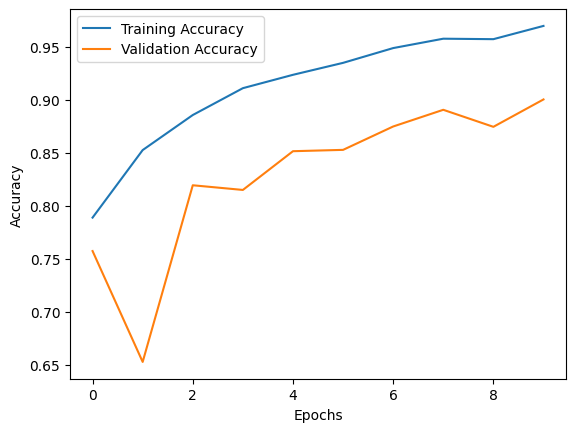

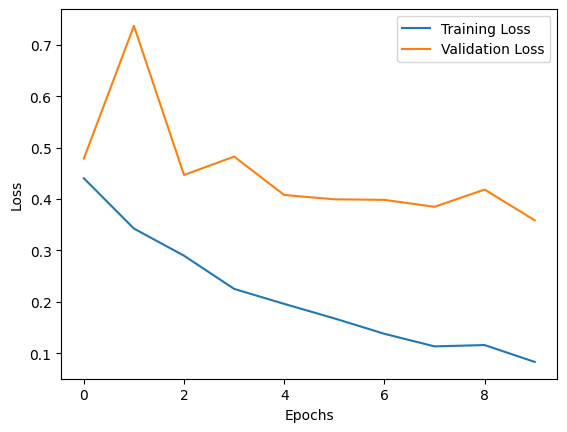

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Define class names manually based on the directory structure
class_names = ['Anthranose', 'Healthy']

def predict_image(image_path, model):
    # Load the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Normalize the image
    img_array = img_array / 255.0

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=-1)[0]
    predicted_class = class_names[predicted_class_idx]
    confidence = np.max(predictions)

    return predicted_class, confidence

# Example prediction
image_path = '2.jpg'
predicted_class, confidence = predict_image(image_path, model)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: Anthranose, Confidence: 1.00
